In [2]:
'''
Generates graphs from CSV output when training models.
'''

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob

# Graph Generation

The following functions take in the name of the game, find the related csv files and prepares the data for presenting, then displays and saves the graphs. 

In [3]:
#A3C
def a3c_graph(game):

    gametitles = {
        "arkanoid": "Arkanoid",
        "mario": "Super Mario Bros.",
        "gradius": "Gradius",
        "pacman": "Pac-Man",
        "spaceinvaders": "Space Invaders"
    }

    filepath = 'csv/' +game+'/a3c/*.csv'
    savefile = 'figures/'+ game +'/'+game+ '_a3c_'
    files = (glob.glob(filepath))

    df_list = []
    for i in range(3):
        df_list.append(pd.read_csv(files[i],index_col=False))
        

    for i in range(3):
        df_list[i] = df_list[i].sort_values(by = 'Steps')
        df_list[i]['MeanReward'] = df_list[i].groupby('Steps')['Reward'].transform('mean')
        df_list[i]['MeanScore'] = df_list[i].groupby('Steps')['Score'].transform('mean')
        df_list[i]['RewardCumSum'] = df_list[i][['MeanReward']].cumsum()
        df_list[i]['ScoreCumSum'] = df_list[i][['MeanScore']].cumsum()



    df_list_means = []

    for i in range(3): 
        new_df = df_list[i][['Steps','MeanReward','MeanScore']].copy()
        new_df = new_df.drop_duplicates()
        new_df['RewardCumSum'] = new_df[['MeanReward']].cumsum()
        new_df['ScoreCumSum'] = new_df[['MeanScore']].cumsum()
        df_list_means.append(new_df)

    one_df = pd.merge(df_list_means[0],df_list_means[1],on='Steps')

    a3c_df=pd.DataFrame()
    a3c_df = pd.merge(one_df,df_list_means[2],on='Steps')
    cols3 = ['MeanReward_x','MeanReward_y','MeanReward','MeanScore_x','MeanScore_y','MeanScore']
    a3c_df = a3c_df.drop(columns=cols3)

    cols1 = ['RewardCumSum_x','RewardCumSum_y','RewardCumSum']
    cols2 = ['ScoreCumSum_x','ScoreCumSum_y','ScoreCumSum']

    a3c_df['AverageRewardCumSum'] = a3c_df[cols1].mean(axis=1)
    a3c_df['AverageScoreCumSum'] = a3c_df[cols2].mean(axis=1)
    a3c_df['StdRewardCumSum'] = a3c_df[cols1].std(ddof=0,axis=1)
    a3c_df['StdScoreCumSum'] = a3c_df[cols2].std(ddof=0,axis=1)

    a3c_df = a3c_df.drop(columns=cols1)
    a3c_df = a3c_df.drop(columns=cols2)

    # error1 = a3c_df['StdScoreCumSum']
    # x1 = a3c_df['Steps']
    # y1 = a3c_df['AverageScoreCumSum']
    # fig1,ax1 = plt.subplots()

    # ax1.plot(a3c_df['Steps'],a3c_df['AverageScoreCumSum'],label=("Run 1"))
    # ax1.fill_between(x1,y1-error1,y1+error1,alpha=0.5)
    # ax1.set_xlabel("Timesteps")
    # ax1.set_ylabel("Score")
    # ax1.legend(loc='best')
    # fig1.savefig(savefile+'cum_score.pdf')

    # for i in range(3):
    #     plot = df_list[i].plot(x="Steps",y="MeanScore",title=(gametitles[game] + " - A3C - Run " + str(i+1)))

    #     plot.set_xlabel('Timesteps')
    #     plot.set_ylabel('Score')
    #     plot.legend(['Score'])

    #     fig=plot.get_figure()
    #     fig.savefig(savefile +'score_'+str(i+1)+'.pdf')

    for i in range(3):
        fig,ax = plt.subplots()
        x = df_list[i]['Steps']
        y = df_list[i]['MeanScore']
        ax.set_title(gametitles[game] + " - A3C - Run " + str(i+1))
        ax.plot(x,y)
        ax.set_xlabel("Timesteps (Millions)")
        ax.set_ylabel("Score")
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(x/1000000)))
        fig.savefig(savefile +'score_'+str(i+1)+'.pdf')


    fig2,ax2 = plt.subplots()
    x2 = a3c_df['Steps']
    y2 = a3c_df['AverageRewardCumSum']
    error2 = a3c_df['StdRewardCumSum']
    ax2.set_title(gametitles[game] + ' - A3C - Cumulative Reward')
    for i in range(3):
        ax2.plot(df_list[i]['Steps'],df_list[i]['RewardCumSum'],label=("Run " + str(i+1)))
    ax2.set_xlabel("Timesteps (Millions)")
    ax2.set_ylabel("Reward")
    ax2.legend(loc='upper left')
    ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(x/1000000)))

    fig2.savefig(savefile+'cum_reward.pdf')
    
    return a3c_df


In [4]:
#PPO 

def ppo_graph(game):


    gametitles = {
        "arkanoid": "Arkanoid",
        "mario": "Super Mario Bros.",
        "gradius": "Gradius",
        "pacman": "Pac-Man",
        "spaceinvaders": "Space Invaders"
    }

    filepath = 'csv/' +game+'/ppo/*.csv'
    savefile = 'figures/'+ game +'/'+game+ '_ppo_'

    files = (glob.glob(filepath))

    df_list =[]
    for i in range(3):
        df_list.append(pd.read_csv(files[i],index_col=False))

    for i in range(3):
        df_list[i] = df_list[i].drop(columns='MeanReward',errors='ignore')
        df_list[i]['MeanReward'] = df_list[i][['Reward1','Reward2','Reward3','Reward4']].mean(axis=1)
        df_list[i]['MeanScore'] = df_list[i][['Score1','Score2','Score3','Score4']].mean(axis=1)
        df_list[i]['RewardCumSum'] = df_list[i][['MeanReward']].cumsum()
        df_list[i]['ScoreCumSum'] = df_list[i][['MeanScore']].cumsum()
    # print(mario_ppo_train[i])

    #df_list[1].iloc[::2,:].plot(x="Steps",y="MeanScore")

    # for i in range(3):
    #     #plot2 = df_list[1].iloc[::2,:].plot(x="Steps",y="MeanScore", title=(gametitles[game] + " - PPO - Run " + str(i)))
    #     plot = df_list[i].plot(x="Steps",y="MeanScore", title=(gametitles[game] + " - PPO - Run " + str(i+1)))

    #     fig=plot.get_figure()
    #     plot.set_ylabel('Score')
    #     plot.legend(['Score'])
    #     plot.set_xlabel('Timesteps')
    #     fig.savefig(savefile +'score_'+str(i+1)+'.pdf')



    one_df =pd.DataFrame()
    one_df = pd.merge(df_list[0],df_list[1],on='Steps')


    new_df= pd.DataFrame()
    new_df = pd.merge(one_df,df_list[2],on='Steps')

    #print(df)

    cols = ['Steps','RewardCumSum_x','RewardCumSum_y','RewardCumSum','ScoreCumSum_x','ScoreCumSum_y','ScoreCumSum']

    ppo_df=pd.DataFrame()
    ppo_df = new_df[cols].copy()

    #print(new_df)

    cols1 = ['RewardCumSum_x','RewardCumSum_y','RewardCumSum']
    cols2 = ['ScoreCumSum_x','ScoreCumSum_y','ScoreCumSum']

    ppo_df['AverageRewardCumSum'] = ppo_df[cols1].mean(axis=1)
    ppo_df['AverageScoreCumSum'] = ppo_df[cols2].mean(axis=1)
    ppo_df['StdRewardCumSum'] = ppo_df[cols1].std(ddof=0,axis=1)
    ppo_df['StdScoreCumSum'] = ppo_df[cols2].std(ddof=0,axis=1)

    ppo_df = ppo_df.drop(columns=cols1)
    ppo_df = ppo_df.drop(columns=cols2)
    # print(mario_ppo_train[1])

    #print(new_df)
    # fig1,ax1 = plt.subplots()
    # error1 = ppo_df['StdScoreCumSum']
    # x1 = ppo_df['Steps']
    # y1 = ppo_df['AverageScoreCumSum']
    # ax1.plot(ppo_df['Steps'],ppo_df['AverageScoreCumSum'],label=("Run 1"))
    # ax1.fill_between(x1,y1-error1,y1+error1,alpha=0.5)
    # ax1.set_xlabel("Timesteps")
    # ax1.set_ylabel("Score")
    # ax1.legend(loc='best')
    # fig1.savefig(savefile+'score.pdf')
    # ax1.set_title(gametitles[game] + ' - PPO')


    for i in range(3):
        fig,ax = plt.subplots()
        x = df_list[i]['Steps']
        y = df_list[i]['MeanScore']
        ax.set_title(gametitles[game] + " - PPO - Run " + str(i+1))
        ax.plot(x,y)
        ax.set_xlabel("Timesteps (Millions)")
        ax.set_ylabel("Score")
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(x/1000000)))
        fig.savefig(savefile +'score_'+str(i+1)+'.pdf')


    fig2,ax2 = plt.subplots()
    x2 = a3c_df['Steps']
    y2 = a3c_df['AverageRewardCumSum']
    error2 = a3c_df['StdRewardCumSum']
    ax2.set_title(gametitles[game] + ' - PPO - Cumulative Reward')
    for i in range(3):
        ax2.plot(df_list[i]['Steps'],df_list[i]['RewardCumSum'],label=("Run " + str(i+1)))
    ax2.set_xlabel("Timesteps (Millions)")
    ax2.set_ylabel("Reward")
    ax2.legend(loc='upper left')
    ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(x/1000000)))

    fig2.savefig(savefile+'cum_reward.pdf')

    return ppo_df



In [5]:
def reward_graph(game,a3c_df,ppo_df):

    gametitles = {
        "arkanoid": "Arkanoid",
        "mario": "Super Mario Bros.",
        "gradius": "Gradius",
        "pacman": "Pac-Man",
        "spaceinvaders": "Space Invaders"
    }
    savefile = 'figures/'+ game +'/'+game+ '_cumrewards.pdf'

    xone = a3c_df['Steps']
    yone = a3c_df['AverageRewardCumSum']
    errorone = a3c_df['StdRewardCumSum']

    figone,axone = plt.subplots()
    axone.plot(xone,yone,label=("A3C"))
    axone.fill_between(xone,yone-errorone,yone+errorone,alpha=0.5)
    axone.set_xlabel("Timesteps (Millions)")
    axone.set_ylabel("Score (Thousands)")
    figone.savefig(savefile)

    xtwo = ppo_df['Steps']
    ytwo = ppo_df['AverageRewardCumSum']
    errortwo = ppo_df['StdRewardCumSum']
    axone.plot(xtwo,ytwo,label=("PPO"))
    axone.legend(loc='upper left')
    axone.fill_between(xtwo,ytwo-errortwo,ytwo+errortwo,alpha=0.5)
    axone.set_title(gametitles[game] + ' - Cumulative Reward')
    axone.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(x/1000000)))
    figone.savefig(savefile)


In [6]:
def score_graph(game,a3c_df,ppo_df):

    gametitles = {
        "arkanoid": "Arkanoid",
        "mario": "Super Mario Bros.",
        "gradius": "Gradius",
        "pacman": "Pac-Man",
        "spaceinvaders": "Space Invaders"
    }
    xone = a3c_df['Steps']
    yone = a3c_df['AverageScoreCumSum']
    errorone = a3c_df['StdScoreCumSum']
    savefile = 'figures/'+ game +'/'+game+ '_cumscores.pdf'

    figone,axone = plt.subplots()
    axone.plot(xone,yone,label=("A3C"))
    axone.fill_between(xone,yone-errorone,yone+errorone,alpha=0.5)

    axone.set_xlabel("Timesteps (Millions)")
    axone.set_ylabel("Score (Thousands)")
    figone.savefig(savefile)

    xtwo = ppo_df['Steps']
    ytwo = ppo_df['AverageScoreCumSum']
    errortwo = ppo_df['StdScoreCumSum']
    axone.plot(xtwo,ytwo,label=("PPO"))
    axone.legend(loc='upper left')
    axone.fill_between(xtwo,ytwo-errortwo,ytwo+errortwo,alpha=0.5)
    axone.set_title(gametitles[game] + ' - Cumulative Score')
    axone.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(x/1000000)))
    axone.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000))))
    figone.savefig(savefile)



# Games

The next few functions are for generating the graphs per game.

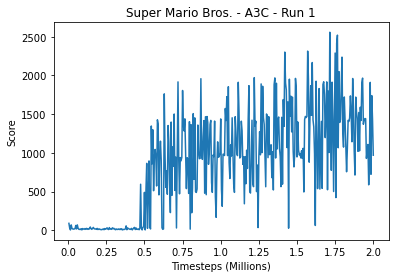

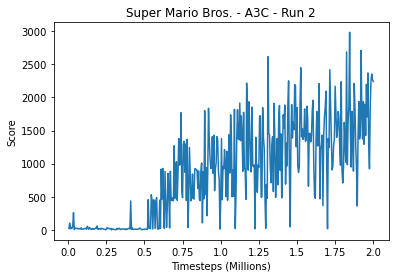

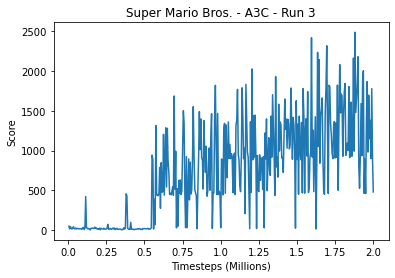

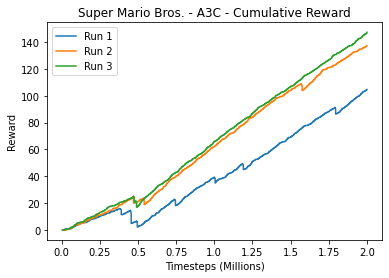

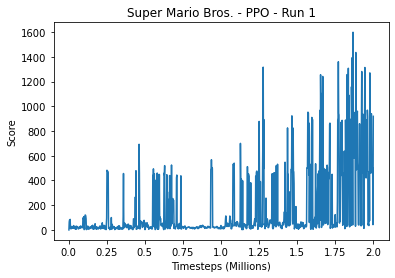

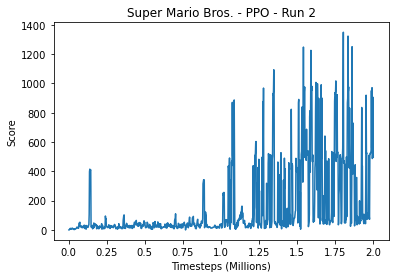

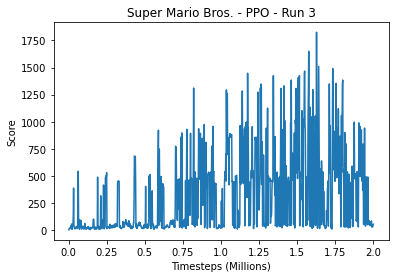

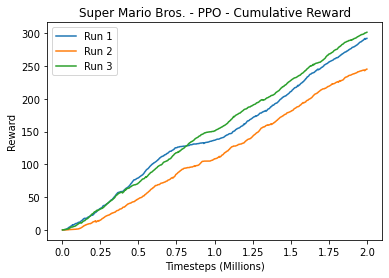

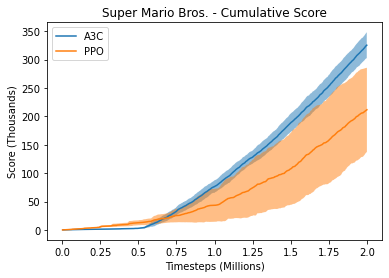

In [7]:
a3c_df = a3c_graph('mario')
ppo_df = ppo_graph('mario')
#reward_graph('mario',a3c_df,ppo_df)
score_graph('mario',a3c_df,ppo_df)

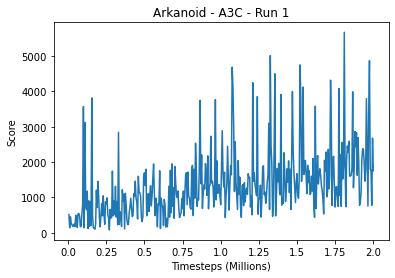

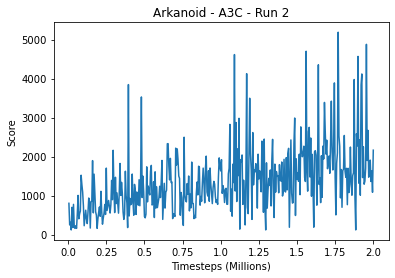

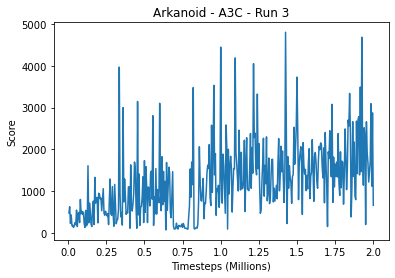

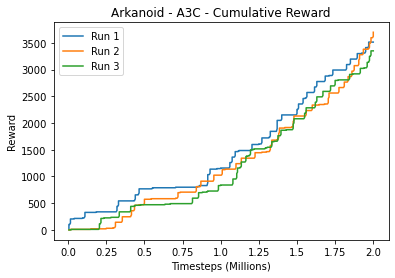

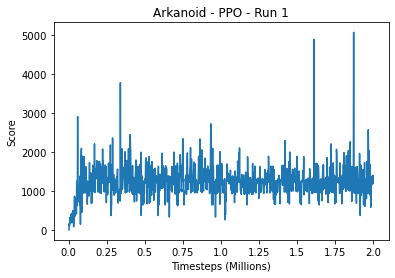

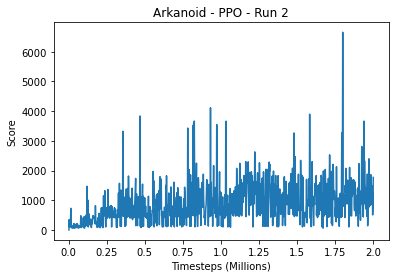

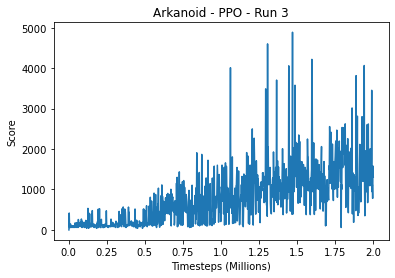

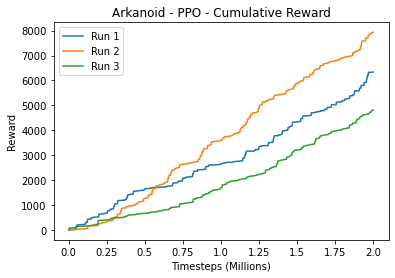

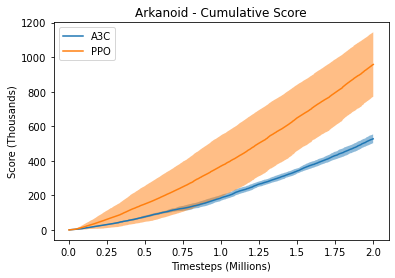

In [8]:
a3c_df = a3c_graph('arkanoid')
ppo_df = ppo_graph('arkanoid')
#reward_graph('arkanoid',a3c_df,ppo_df)
score_graph('arkanoid',a3c_df,ppo_df)

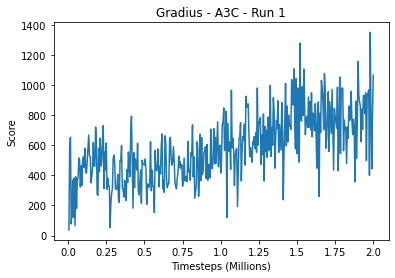

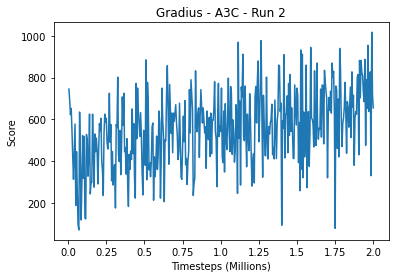

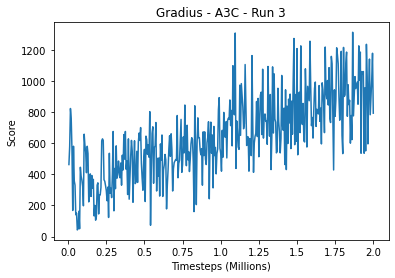

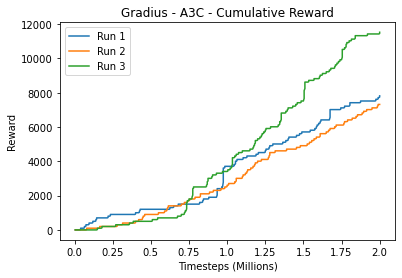

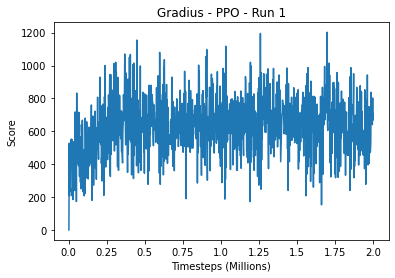

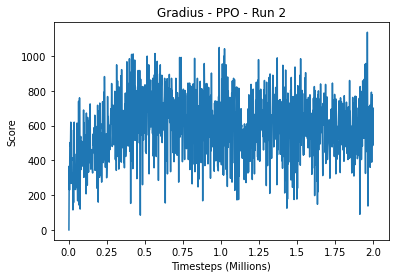

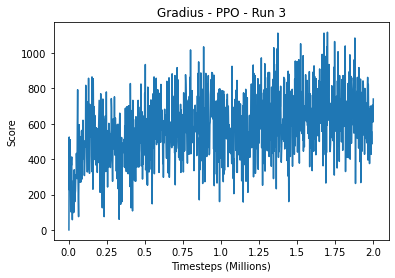

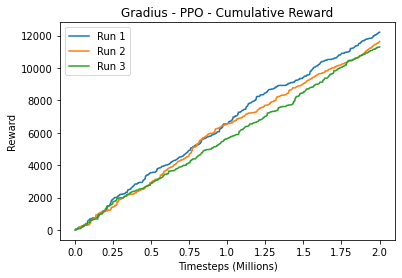

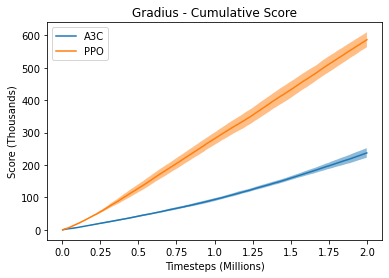

In [9]:
a3c_df = a3c_graph('gradius')
ppo_df = ppo_graph('gradius')
#reward_graph('gradius',a3c_df,ppo_df)
score_graph('gradius',a3c_df,ppo_df)

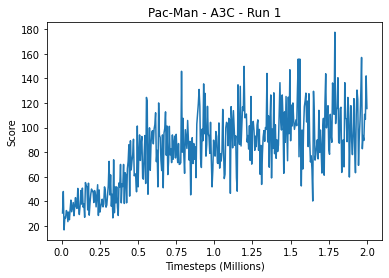

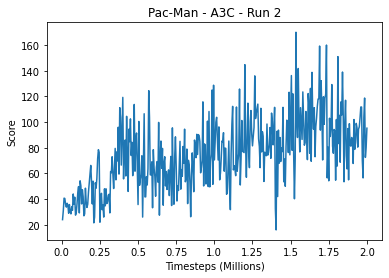

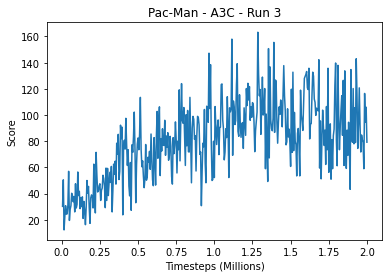

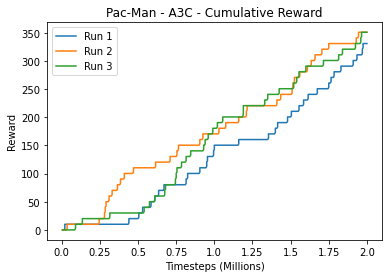

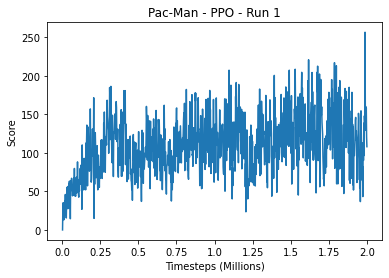

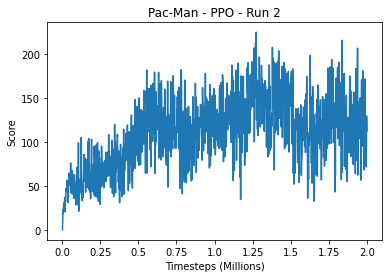

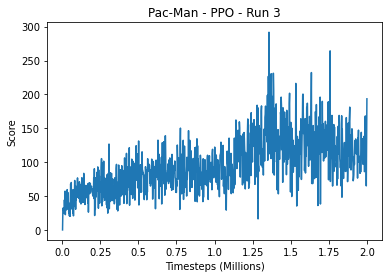

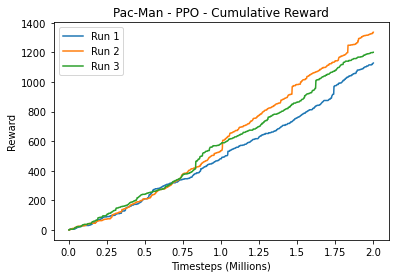

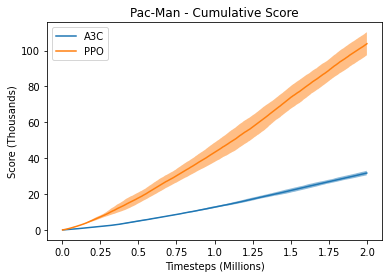

In [10]:
a3c_df = a3c_graph('pacman')
ppo_df = ppo_graph('pacman')
#reward_graph('pacman',a3c_df,ppo_df)
score_graph('pacman',a3c_df,ppo_df)

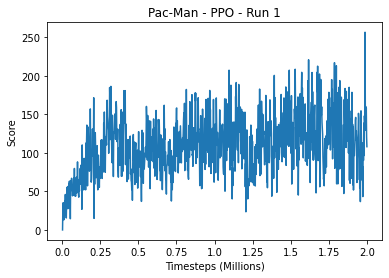

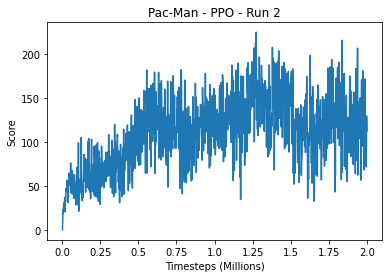

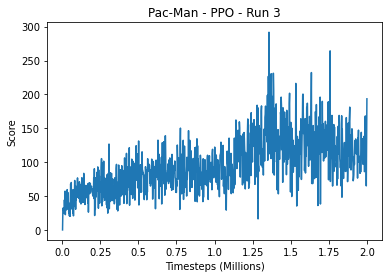

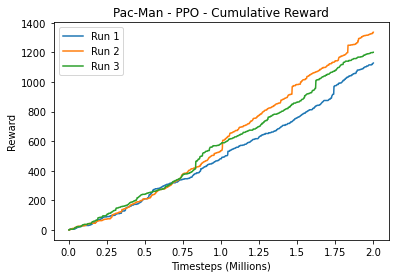

In [12]:
#a3c_df = a3c_graph('spaceinvaders')
ppo_df = ppo_graph('pacman')
#reward_graph('pacman',a3c_df,ppo_df)
#score_graph('pacman',a3c_df,ppo_df)